AutoML로 자동적으로 딥러닝 모델 만들어주는 라이브러리

https://autokeras.com/

In [1]:
%pip install autokeras

     |████████████████████████████████| 166 kB 5.4 MB/s 
     |████████████████████████████████| 97 kB 7.6 MB/s 
     |████████████████████████████████| 454.3 MB 14 kB/s 
     |████████████████████████████████| 462 kB 49.3 MB/s 
     |████████████████████████████████| 1.2 MB 46.8 MB/s 
     |████████████████████████████████| 4.0 MB 17.1 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.40.0
    Uninstalling grpcio-1.40.0:
      Successfully uninstalled grpcio-1.40.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
      Successfully uninstalled tensorflow-2.6.0


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

import autokeras as ak

In [3]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [4]:
tf.__version__

'2.5.0'

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


In [6]:
y_train.max()

9

In [7]:
y_train = tf.keras.utils.to_categorical(y_train)

In [8]:
y_train.shape

(60000, 10)

In [9]:
y_test = tf.keras.utils.to_categorical(y_test)

ImageClassifier

https://autokeras.com/image_classifier/

In [10]:
# Initialize the image classifier.
clf = ak.ImageClassifier(max_trials=1)
# Feed the image classifier with training data.
clf.fit(
    x_train,
    y_train,
    # Split the training data and use the last 15% as validation data.
    validation_split=0.15,
    epochs=10
)

# Predict with the best model.
predicted_y = clf.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))



Trial 1 Complete [00h 23m 32s]
val_loss: 0.22601957619190216

Best val_loss So Far: 0.22601957619190216
Total elapsed time: 00h 23m 32s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
1875/1875 [==============================] - 165s 88ms/step - loss: 0.4270 - accuracy: 0.8481
Epoch 2/10
1875/1875 [==============================] - 163s 87ms/step - loss: 0.3109 - accuracy: 0.8896
Epoch 3/10
1875/1875 [==============================] - 162s 87ms/step - loss: 0.2774 - accuracy: 0.9005
Epoch 4/10
1875/1875 [==============================] - 162s 87ms/step - loss: 0.2580 - accuracy: 0.9060
Epoch 5/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.2428 - accuracy: 0.9119
Epoch 6/10
1875/1875 [==============================] - 161s 86ms/step - loss: 0.2303 - accuracy: 0.9166
Epoch 7/10
1875/1875 [==============================] - 164s 87ms/step - loss: 0.2231 - accuracy: 0.9180
Epoch 8/10
1875/1875 [==============================] - 162s 86ms/step - loss: 0.2166 - acc

In [11]:
model = clf.export_model()

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 28, 28)            0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 28, 28, 1)         0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0     

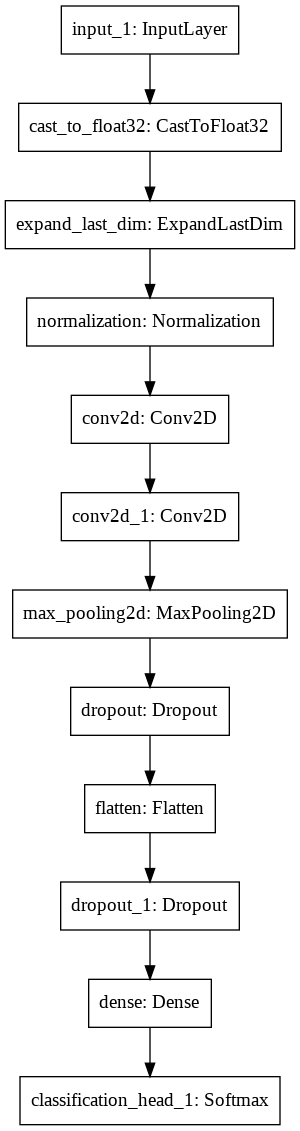

In [13]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [16]:
pred_y = clf.predict(x_test[0:3,:,:])

1/1 [==============================] - 0s 22ms/step


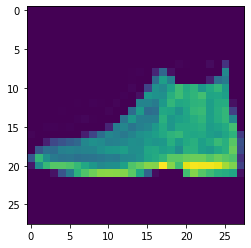

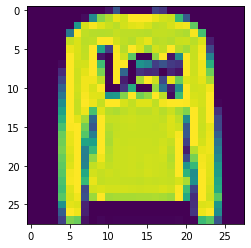

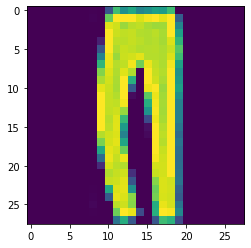

In [15]:
import matplotlib.pyplot as plt
for i in range(3):
  plt.figure()
  
  plt.imshow(x_test[i,:,:])